In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_curve,auc

In [4]:
path = "F:/for learn/Python/Python_ML_and_Kaggle/Datasets/Breast-Cancer/"

colnames = ["Sample code number", 
            "Clump Thickness", 
            "Uniformity of Cell Size", 
            "Uniformity of Cell Shape", 
            "Marginal Adhesion", 
            "Single Epithelial", 
            "Bare Nuclei", 
            "Bland Chromatin", 
            "Normal Nucleoli", 
            "Mitoses", 
            "Class"]

data = pd.read_csv(path + "breast-cancer-wisconsin.data", names=colnames)
# data.apply(lambda x: np.sum(x == "?"), axis=0)

In [5]:
data = data.replace(to_replace="?", value=np.nan)
data = data.dropna(how="any")
# data.shape
x_train, x_test, y_train, y_test = train_test_split(data[colnames[1:10]],
                                                    data[colnames[10]],
                                                    test_size=0.25,
                                                    random_state=33)

y_train.value_counts()
y_test.value_counts()

2    100
4     71
Name: Class, dtype: int64

In [6]:
# 特征标准化，根据训练集fit的信息才能transform测试集。
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [7]:
lr = LogisticRegression()
sgd = SGDClassifier()

lr.fit(x_train, y_train)
lr_y_predict = lr.predict(x_test)
sgd.fit(x_train, y_train)
sgd_y_predict = sgd.predict(x_test)
# lr.score(x_test,y_test)
# sgd.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [ ]:
print(classification_report(y_pred=lr_y_predict, y_true=y_test, target_names=["Benign", "Maglignant"]))

In [10]:
print(classification_report(y_pred=sgd_y_predict, y_true=y_test,target_names=["Benign", "Maglignant"]))

             precision    recall  f1-score   support

     Benign       0.99      0.98      0.98       100
 Maglignant       0.97      0.99      0.98        71

avg / total       0.98      0.98      0.98       171



In [12]:
lr.predict_proba(x_test)

array([[  6.81480111e-01,   3.18519889e-01],
       [  9.92292118e-01,   7.70788204e-03],
       [  4.00669014e-05,   9.99959933e-01],
       [  5.05352024e-02,   9.49464798e-01],
       [  9.73544598e-01,   2.64554023e-02],
       [  9.94645605e-01,   5.35439484e-03],
       [  9.75199036e-01,   2.48009641e-02],
       [  1.65156707e-01,   8.34843293e-01],
       [  9.86712728e-01,   1.32872723e-02],
       [  9.70527841e-01,   2.94721594e-02],
       [  9.91557685e-01,   8.44231494e-03],
       [  9.58156704e-01,   4.18432958e-02],
       [  2.23091553e-01,   7.76908447e-01],
       [  9.92963113e-01,   7.03688717e-03],
       [  4.68821459e-03,   9.95311785e-01],
       [  2.39314519e-01,   7.60685481e-01],
       [  2.83439447e-03,   9.97165606e-01],
       [  1.51939755e-01,   8.48060245e-01],
       [  8.23081444e-04,   9.99176919e-01],
       [  7.89107567e-01,   2.10892433e-01],
       [  9.80362944e-01,   1.96370563e-02],
       [  2.03525058e-02,   9.79647494e-01],
       [  

In [43]:
fpr, tpr, threhold = roc_curve(y_true=y_test, y_score=lr.predict_proba(x_test)[:,0], pos_label=2)
auc(fpr,tpr)

0.99929577464788732

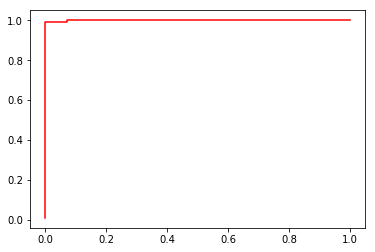

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr,tpr,"red")

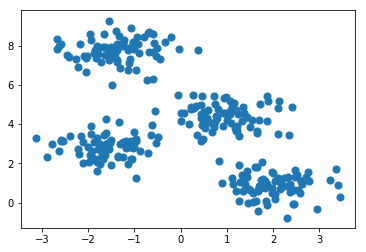

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
import pandas as pd

In [11]:
from xgboost.sklearn import XGBClassifier

In [13]:
xgb = XGBClassifier()

In [14]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [15]:
xgb.predict_proba(x_test)

array([[  7.22312927e-01,   2.77687103e-01],
       [  9.99290109e-01,   7.09909480e-04],
       [  9.93978977e-03,   9.90060210e-01],
       [  1.64968967e-02,   9.83503103e-01],
       [  9.91392076e-01,   8.60790629e-03],
       [  9.99290109e-01,   7.09909480e-04],
       [  9.97631431e-01,   2.36855191e-03],
       [  1.57485902e-01,   8.42514098e-01],
       [  9.98767972e-01,   1.23204233e-03],
       [  9.95429039e-01,   4.57095820e-03],
       [  9.98767972e-01,   1.23204233e-03],
       [  9.98654485e-01,   1.34553609e-03],
       [  2.48602331e-01,   7.51397669e-01],
       [  9.99290109e-01,   7.09909480e-04],
       [  1.96355581e-03,   9.98036444e-01],
       [  5.13225794e-02,   9.48677421e-01],
       [  5.18977642e-03,   9.94810224e-01],
       [  1.14839256e-01,   8.85160744e-01],
       [  7.87985325e-03,   9.92120147e-01],
       [  4.35044587e-01,   5.64955413e-01],
       [  9.98953104e-01,   1.04691216e-03],
       [  8.58891010e-03,   9.91411090e-01],
       [  